<a href="https://colab.research.google.com/github/DommiiUdomp/Prediction/blob/main/House_Conventional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

import warnings 
warnings.filterwarnings ("ignore")

import plotly.graph_objects as go
import sklearn.feature_selection as fs
import sklearn.linear_model as lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data Exploration**

In [2]:
df = pd.read_csv('/content/train.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True) 
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [5]:
df_cat = df.loc[:,df.dtypes==np.object]
df_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [6]:
df_num = df.select_dtypes(include='number')
df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [7]:
df_num = df_num.fillna(df_num.mean())
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [8]:
u = {}
for i in df_cat.columns:
    u[i] = (len(df_cat[i].unique()))
    
u

{'BldgType': 5,
 'BsmtCond': 5,
 'BsmtExposure': 5,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'BsmtQual': 5,
 'CentralAir': 2,
 'Condition1': 9,
 'Condition2': 8,
 'Electrical': 6,
 'ExterCond': 5,
 'ExterQual': 4,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'Foundation': 6,
 'Functional': 7,
 'GarageCond': 6,
 'GarageFinish': 4,
 'GarageQual': 6,
 'GarageType': 7,
 'Heating': 6,
 'HeatingQC': 5,
 'HouseStyle': 8,
 'KitchenQual': 4,
 'LandContour': 4,
 'LandSlope': 3,
 'LotConfig': 5,
 'LotShape': 4,
 'MSZoning': 5,
 'MasVnrType': 5,
 'Neighborhood': 25,
 'PavedDrive': 3,
 'RoofMatl': 8,
 'RoofStyle': 6,
 'SaleCondition': 6,
 'SaleType': 9,
 'Street': 2,
 'Utilities': 2}

In [9]:
df_cat.drop(columns=['Neighborhood','Condition1','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd',
                            'BsmtFinType1','BsmtFinType2','Functional','GarageType','SaleType'], inplace=True)

df_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,BrkFace,...,GasA,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,1Fam,Gable,None,...,GasA,Ex,Y,SBrkr,TA,RFn,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,Gable,BrkFace,...,GasA,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,Gable,None,...,GasA,Gd,Y,SBrkr,Gd,Unf,TA,TA,Y,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,1Fam,Gable,BrkFace,...,GasA,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,None,...,GasA,Ex,Y,SBrkr,TA,RFn,TA,TA,Y,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,Stone,...,GasA,TA,Y,SBrkr,TA,Unf,TA,TA,Y,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,None,...,GasA,Ex,Y,SBrkr,Gd,RFn,TA,TA,Y,Normal


In [10]:
df_cat = df_cat.fillna(df_cat.mode().iloc[0])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   BldgType       1460 non-null   object
 8   RoofStyle      1460 non-null   object
 9   MasVnrType     1460 non-null   object
 10  ExterQual      1460 non-null   object
 11  ExterCond      1460 non-null   object
 12  Foundation     1460 non-null   object
 13  BsmtQual       1460 non-null   object
 14  BsmtCond       1460 non-null   object
 15  BsmtExposure   1460 non-null   object
 16  Heating        1460 non-null   object
 17  HeatingQC      1460 non-null   object
 18  CentralAir     1460 non-null

In [11]:
ord_enc = OrdinalEncoder()

encoded = []
for i in df_cat.columns:
    df_cat[i] = ord_enc.fit_transform(df_cat[[i]])
    encoded.append(df_cat)
    
df_cat_encoded = encoded[25]
df_cat_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0,4.0
2,3.0,1.0,3.0,3.0,0.0,2.0,0.0,0.0,1.0,2.0,...,1.0,0.0,1.0,4.0,3.0,1.0,4.0,4.0,2.0,4.0
3,3.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0,4.0
4,3.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,...,1.0,2.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,0.0
5,3.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,2.0,...,1.0,0.0,1.0,4.0,3.0,1.0,4.0,4.0,2.0,4.0
1457,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,3.0,...,1.0,4.0,1.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0
1458,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,2.0,...,1.0,0.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0,4.0


In [12]:
House_Prices_df = df_cat_encoded.join(df_num)
House_Prices_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,1.0,...,0,61,0,0,0,0,0,2,2008,208500
2,3.0,1.0,3.0,3.0,0.0,2.0,0.0,0.0,1.0,2.0,...,298,0,0,0,0,0,0,5,2007,181500
3,3.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,1.0,...,0,42,0,0,0,0,0,9,2008,223500
4,3.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0,35,272,0,0,0,0,2,2006,140000
5,3.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,1.0,1.0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,2.0,...,0,40,0,0,0,0,0,8,2007,175000
1457,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,3.0,...,349,0,0,0,0,0,0,2,2010,210000
1458,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,2.0,...,0,60,0,0,0,0,2500,5,2010,266500


In [13]:
X_train = House_Prices_df.drop(columns=['SalePrice'])
y_train = House_Prices_df['SalePrice']
X_train

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,1.0,...,548,0,61,0,0,0,0,0,2,2008
2,3.0,1.0,3.0,3.0,0.0,2.0,0.0,0.0,1.0,2.0,...,460,298,0,0,0,0,0,0,5,2007
3,3.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,1.0,...,608,0,42,0,0,0,0,0,9,2008
4,3.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,...,642,0,35,272,0,0,0,0,2,2006
5,3.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,1.0,1.0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,2.0,...,460,0,40,0,0,0,0,0,8,2007
1457,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,3.0,...,500,349,0,0,0,0,0,0,2,2010
1458,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,2.0,...,252,0,60,0,0,0,0,2500,5,2010


In [14]:
def forward_stepwise(X, y,threshold_in, verbose=False):
    a_list = []
    # creating a variable included that will have a list of a_list variable 
    included = list(a_list)
    # Using while loop to set a condition for selecting best features into included and worst features into excluded variables
    while True:
        # creating a variable excluded that will take the columns name excluding the ones from included variable
        excluded = list(set(X.columns)-set(included)) 
        # creating a new variable new_pval that holds all the pvalues of the excluded columns
        new_pval = pd.Series(index=excluded)
#         print('The remaining independent variables in our dataset are:')   # displaying this message
#         print(excluded)     # printing or displaying all the columns in excluded list
#         print(' ')       # displaying empty space
        changed=False      # set the condition at this stage
        
        for new_column in excluded:           # use for loop to iterate through each variable
            ## use stepwise to fit the model 
            final_model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            
            ## extracting pvalues from the model
            new_pval[new_column] = final_model.pvalues[new_column]
            
        ## best-pval are the minimum p-values from the list of p-values obtained above in new-pval
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            performed_variables = new_pval.idxmin()
            included.append(performed_variables)
            changed=True
            
            ## this will give us the most features using stepwise regression method i.e it will Add best features as performed variables and print it out            
            if verbose:
#                 print('now add this variable to the best performing features')
                print('Add  {:30} with p-value {:.6}'.format(performed_variables, best_pval))
#                 print(' ')
#                 print('The best performing features are:')
#                 print(included)
#                 print(' ')
        if not changed:
            break
    ## this will return the included list of features with p-values that are less than threshold-in and summary statistics of the model
    return included

In [15]:
best_features = forward_stepwise(X_train, y_train, 0.05, verbose = True)
best_features

Add  OverallQual                    with p-value 2.18568e-313
Add  GrLivArea                      with p-value 1.87051e-87
Add  BsmtFinSF1                     with p-value 3.42354e-39
Add  BsmtQual                       with p-value 6.32269e-33
Add  MSSubClass                     with p-value 5.65479e-23
Add  GarageCars                     with p-value 2.728e-18
Add  KitchenQual                    with p-value 5.15133e-20
Add  BsmtExposure                   with p-value 1.33768e-09
Add  ExterQual                      with p-value 8.34399e-08
Add  LotArea                        with p-value 4.58998e-07
Add  OverallCond                    with p-value 1.70485e-06
Add  YearBuilt                      with p-value 2.11778e-10
Add  MasVnrArea                     with p-value 2.72519e-06
Add  Fireplaces                     with p-value 1.55794e-05
Add  BsmtFullBath                   with p-value 0.000654671
Add  LotFrontage                    with p-value 0.000944266
Add  MasVnrType          

['OverallQual',
 'GrLivArea',
 'BsmtFinSF1',
 'BsmtQual',
 'MSSubClass',
 'GarageCars',
 'KitchenQual',
 'BsmtExposure',
 'ExterQual',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFullBath',
 'LotFrontage',
 'MasVnrType',
 'ScreenPorch',
 'SaleCondition',
 'WoodDeckSF',
 'LandContour',
 'Street']

In [16]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    df = df.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])
    
    df_cat = df.loc[:,df.dtypes==np.object]
    df_num = df.select_dtypes(include='number')

    df_numerical = df_num.fillna(df_num.mean())
    df_categorical = df_cat.fillna(df_cat.mode().iloc[0])
    # deleting categorical columns with more than 7 unique categories
    df_categorical.drop(columns=['Neighborhood','Condition1','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd',
                            'BsmtFinType1','BsmtFinType2','Functional','GarageType','SaleType'], inplace=True)
    
    ord_enc = OrdinalEncoder()

    encoded = []
    for i in df_categorical.columns:
        df_categorical[i] = ord_enc.fit_transform(df_categorical[[i]])
        encoded.append(df_categorical)

    df_categorical_encoded = encoded[25]
    df_categorical_encoded
    
    HouseP_test_df = df_categorical_encoded.join(df_numerical)
    
    return HouseP_test_df

In [17]:
X_test = wrangle('test.csv')
y_test_target = pd.read_csv('sample_submission.csv')
y_test = y_test_target['SalePrice']

# Training data
X_train = X_train[best_features]
y_train = House_Prices_df['SalePrice']

# Testing data
X_test = X_test[best_features]
y_test = y_test_target['SalePrice']

In [99]:
px.box(y_train,width=500, height=500)

# **Create Linear Model**

In [93]:
model = LinearRegression().fit(X_train,y_train)
# generating predictions of the model
y_prediction = model.predict(X_test)
y_prediction

array([113243.04773924, 159869.31188651, 171348.01314642, ...,
       151306.4334879 , 109392.62294316, 232433.68618587])

In [94]:
# Evaluating by R^2 and RMSE
r_sq = r2_score(y_test,y_prediction)
print('coefficient of determination:',r_sq)
# Evaluating by mean square error (mse)
mse = mean_squared_error(y_test, y_prediction)
# Evaluating by root mean square error (rmse)
RMSE = np.sqrt(mse)
print(f'RMSE for Linear Regression is {RMSE}')

coefficient of determination: -16.962033285559706
RMSE for Linear Regression is 69983.2801226541


In [96]:
prediction_df = pd.DataFrame(y_prediction)
prediction_df.rename(columns={0:'SalePrice'}, inplace=True)
prediction_df

,SalePrice
0,113243.047739
1,159869.311887
2,171348.013146
3,182644.189807
4,182535.803294
...,...
1454,66772.128793
1455,59806.095690
1456,151306.433488
1457,109392.622943


In [97]:
cus_id = y_test_target[['Id']]
House_Prices_Predictions = cus_id.join(prediction_df)
House_Prices_Predictions.to_csv(r'/content/house-prices-advanced-regression-techniques.csv', index = False)
House_Prices_Predictions

,Id,SalePrice
0,1461,113243.047739
1,1462,159869.311887
2,1463,171348.013146
3,1464,182644.189807
4,1465,182535.803294
...,...,...
1454,2915,66772.128793
1455,2916,59806.095690
1456,2917,151306.433488
1457,2918,109392.622943


In [129]:
df_pred_test = pd.DataFrame({'y_test':y_test, 'y_prediction':y_prediction, 'ID':y_test_target['Id']})
df_pred_test.set_index('ID',inplace=True)
df_pred_test.head()

,y_test,y_prediction
ID,,
1461,169277.052498,113243.047739
1462,187758.393989,159869.311887
1463,183583.683570,171348.013146
1464,179317.477511,182644.189807
1465,150730.079977,182535.803294


In [132]:
fig = px.line(df_pred_test, labels={'Actual Price':'Predicted Price'})

fig.show()

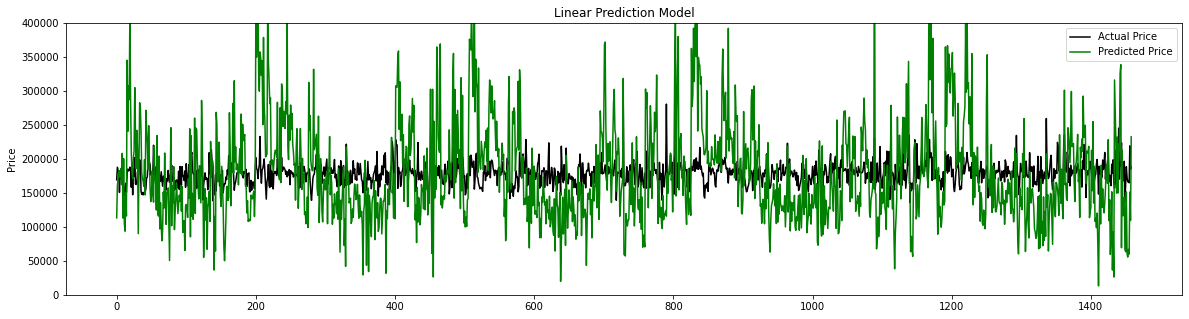

In [146]:
# plot the test predictions
def plot(actual, predict, name):
  plt.figure(figsize=(20,5))
  plt.plot(actual,color='black',label='Actual Price')
  plt.plot(predict,color='green',label='Predicted Price')
  plt.title(f'{name}')
  plt.ylabel('Price')
  plt.ylim((0,400000))
  plt.legend(loc='upper right')
  plt.show()

plot(y_test, y_prediction, 'Linear Prediction Model')

# **kNN Model**

In [136]:
# create model object
knn_model = KNeighborsRegressor(n_neighbors=3)
# fit the model
knn_model.fit(X_train, y_train)
# generate predictions
y_predictions_knn = knn_model.predict(X_test)
print(f'y_predictions{y_predictions_knn}')
RMSE_KNN = np.sqrt(mean_squared_error(y_test, y_predictions_knn))
print(f'The root mean square for KNN is {RMSE_KNN}')

KNN_r_square = r2_score(y_test, y_predictions_knn)
print(f'The r-square for the KNN model is {KNN_r_square}')

y_predictions[134333.33333333 178666.66666667 160833.33333333 ... 182000.
 132416.66666667 240766.66666667]
The root mean square for KNN is 59978.88474382531
The r-square for the KNN model is -12.19361117847178


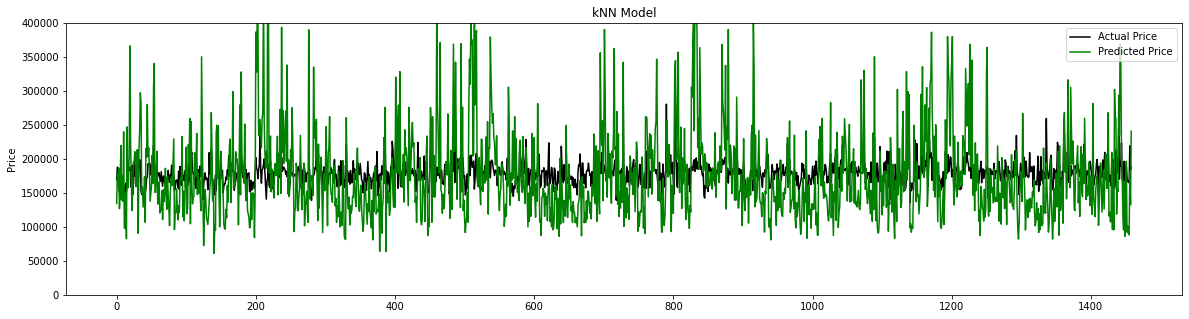

In [147]:
plot(y_test, y_predictions_knn, 'kNN Model')

In [139]:
# creating parameters variables to be selected the best performing
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"]}
# create object for grid search to select the best performing parameters
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
# fit the Grid Search object with training data
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [140]:
gridsearch.best_params_

{'n_neighbors': 8, 'weights': 'distance'}

In [141]:
# selecting best neighbor and weights from best parameters
best_neighbor = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]

# initialize another object for bagging model and fit the model
MybaggedKNN = KNeighborsRegressor(n_neighbors = best_neighbor, weights = best_weights)
model_Bagging = BaggingRegressor(MybaggedKNN, n_estimators=100)
model_Bagging.fit(X_train, y_train)

# generate predictions
y_predictions_grid = model_Bagging.predict(X_test)
print(y_predictions_grid)

RMSE_KNN_Bag = np.sqrt(mean_squared_error(y_test, y_predictions_grid))
print(f'The root mean square for KNN bagging model is {RMSE_KNN_Bag}')

KNN_r_square_Bag = r2_score(y_test, y_predictions_grid)
print(f'The r-square for the KNN bagging model is {KNN_r_square_Bag}')

[135250.04831992 179354.8369716  174555.11711927 ... 222256.87769818
 128582.7352604  231139.92671414]
The root mean square for KNN bagging model is 51860.27189364955
The r-square for the KNN bagging model is -8.863623519125124


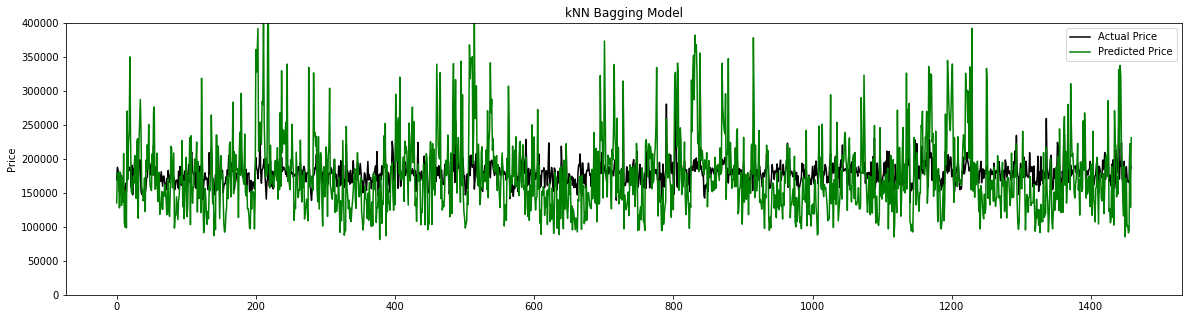

In [148]:
plot(y_test,y_predictions_grid,'kNN Bagging Model')

# **Decition Tree Model**

In [149]:
# creating empty dictionary that will store max depths as keys and mse as values
MSE = {}
# use for loop to iterate in the range of 100 max depths to see which one is optimal than others
for i in range(1,100):
    # create a regressor object
    Dec_regressor = DecisionTreeRegressor(random_state = 0, max_depth=i) 

    # fit the regressor with X_trains and y_trains data
    Dec_regressor.fit(X_train, y_train)

    # predicting the test data

    y_Decision_pred = Dec_regressor.predict(X_test)
    # Calculating mean square error
    MSE_DecisionTree = mean_squared_error(y_test, y_Decision_pred)
    # saving max depth as key and mse as values in empty dictionary created
    MSE[i] = MSE_DecisionTree
    
# Extracting max depth that gives minimum mse and take it as an optimal max depth
Keymin = min(zip(MSE.values(), MSE.keys()))[1]
# printing the optimal max-depth
print(f'The optimal max_depth is {Keymin}')

The optimal max_depth is 1


In [150]:
# create a regressor object
Dec_regressor = DecisionTreeRegressor(random_state = 0, max_depth=Keymin) 
  
# fit the regressor with X_trains and y_trains data
Dec_regressor.fit(X_train, y_train)

y_Decision_pred = Dec_regressor.predict(X_test)
print(y_Decision_pred)

RMSE_DecisionTree = np.sqrt(mean_squared_error(y_test, y_Decision_pred))
print(f'The root mean square for Decision Tree regression model is {RMSE_DecisionTree}')

DecisionTree_r_square = r2_score(y_test, y_Decision_pred)
print(f'The r-square for the Decision Tree regression model is {DecisionTree_r_square}')

[157832.43298132 157832.43298132 157832.43298132 ... 157832.43298132
 157832.43298132 157832.43298132]
The root mean square for Decision Tree regression model is 57259.83556256904
The r-square for the Decision Tree regression model is -11.024502077961063


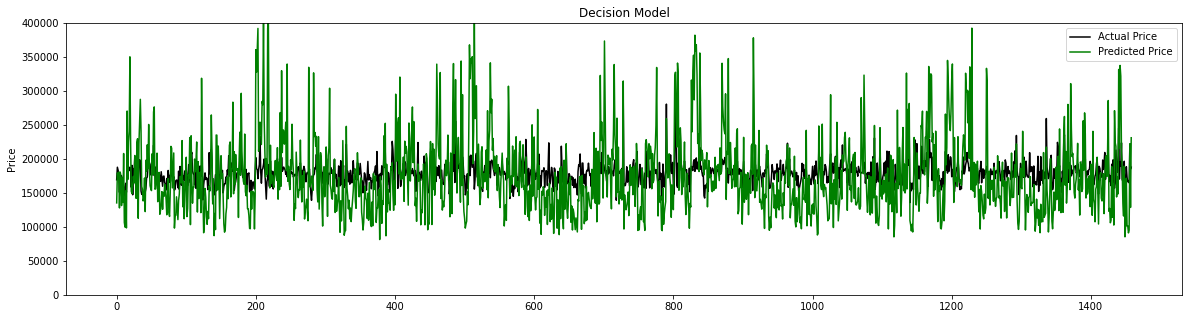

In [151]:
plot(y_test,y_predictions_grid,'Decision Model')